# Cats vs Dogs CNN

Realitzar una xarxa neuronal convolucional per el següent conjunt de dades.
Aquest nou conjunt de dades difereix del conjunt `Fashion Mnist` en que no es troba preparat per a funcionar.

### Llibreries necessaries

Veurem que a més de les llibreries habituals també importem la llibreria `tensorflow_datasets` que conté el nostre conjunt de dades.

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
import tensorflow_datasets as tfds
# Altres llibreries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


## Cárrega de dades

Carregam les dades, a l'hora que les baixam també definim els conjunts de validació i test. 

En segon lloc redimensionam les imatges i cream _batch_ de mida 32, es a dir que contenen 32 imatges.

In [2]:
# Descarregam el conjunt de dades ja divit
train_ds, validation_ds, test_ds = tfds.load(
    "cats_vs_dogs",
    # Reserve 10% for validation and 10% for test
    split=["train[:40%]", "train[40%:50%]", "train[50%:60%]"],
    as_supervised=True,  # Incluim les etiquetes
)

In [3]:
img_size = (150, 150) # Definim la mida de les nostres imatges, les reescalam totes a aquesta mida
train_ds = train_ds.map(lambda x, y: (tf.image.resize(x, img_size), y))
# Cream els batchs
train_ds = train_ds.cache().batch(32).prefetch(buffer_size=10)

validation_ds = validation_ds.map(lambda x, y: (tf.image.resize(x, img_size), y))
validation_ds = validation_ds.cache().batch(1).prefetch(buffer_size=10)

Mostram alguns exemples del conjunt d'entrenament, és important saber com son les dades que emprarem i com a mínim hem de fer una petita exploració:

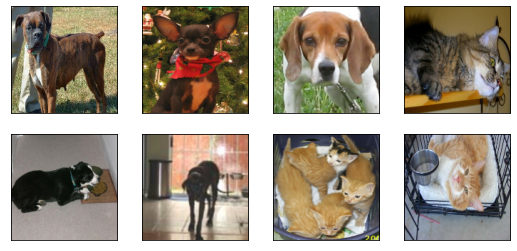

In [4]:
it = train_ds.as_numpy_iterator()
img_batch = next(it)

n_images = 8
figure = plt.figure(figsize=(9, 9))
for i in range(n_images):

  ax = plt.subplot(n_images/2, n_images//2, i + 1)
  ax.set_xticks(())
  ax.set_yticks(())
  ax.imshow(img_batch[0][i,:,:]/255)

## Definició del model

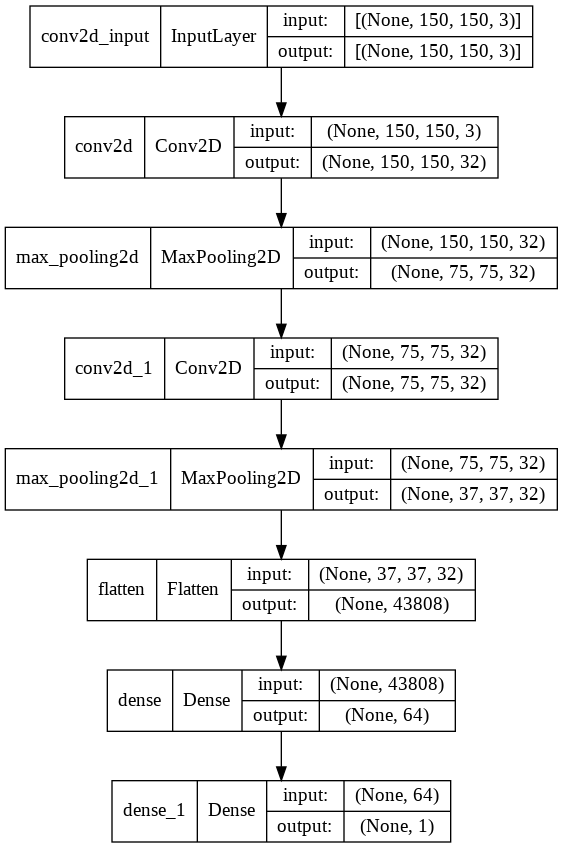

In [5]:
# Definir el model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(150, 150, 3), padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(75, 75, 32), padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Dibuixar model
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 43808)             0         
                                                                 
 dense (Dense)               (None, 64)                2

## Compilar el model

In [7]:
model.compile(optimizer='adam', # també podria ser el descens de gradient tradicional
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
history = model.fit(train_ds, epochs=10, validation_data=(validation_ds))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


291/291 [==============================] - 38s 114ms/step - loss: 14.3882 - accuracy: 0.5441 - val_loss: 0.6726 - val_accuracy: 0.5825
Epoch 2/10
291/291 [==============================] - 15s 53ms/step - loss: 0.5973 - accuracy: 0.6615 - val_loss: 0.7065 - val_accuracy: 0.6053
Epoch 3/10
291/291 [==============================] - 15s 53ms/step - loss: 0.4507 - accuracy: 0.7630 - val_loss: 0.8273 - val_accuracy: 0.6071
Epoch 4/10
291/291 [==============================] - 15s 52ms/step - loss: 0.3187 - accuracy: 0.8471 - val_loss: 0.9672 - val_accuracy: 0.6019
Epoch 5/10
291/291 [==============================] - 16s 53ms/step - loss: 0.2622 - accuracy: 0.8858 - val_loss: 1.1764 - val_accuracy: 0.5868
Epoch 6/10
291/291 [==============================] - 16s 54ms/step - loss: 0.2336 - accuracy: 0.9087 - val_loss: 1.4706 - val_accuracy: 0.5937
Epoch 7/10
291/291 [==============================] - 15s 53ms/step - loss: 0.2005 - accuracy: 0.9241 - val_loss: 1.7107 - val_accuracy: 0.5989
E

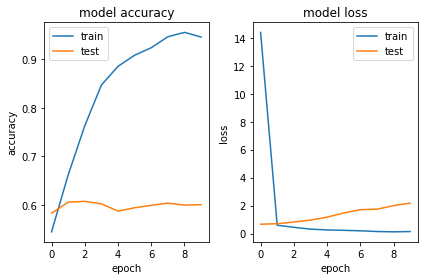

In [9]:
# Mostrar les gràfiques d'entrenament
# (history.history.keys())

# Mostram els resultats de l'entrenament de manera gràfica
figure, ax = plt.subplots(nrows=1, ncols=2)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])

ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
#ax[0].set_ylim(0,1)
ax[0].legend(['train', 'test'], loc='upper left')

# summarize history for loss
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
#ax[1].set_ylim(0,1)
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'test'], loc='upper right')
figure.tight_layout()
plt.show()

## Proves finals

Intentar classificar imatges del conjunt de test

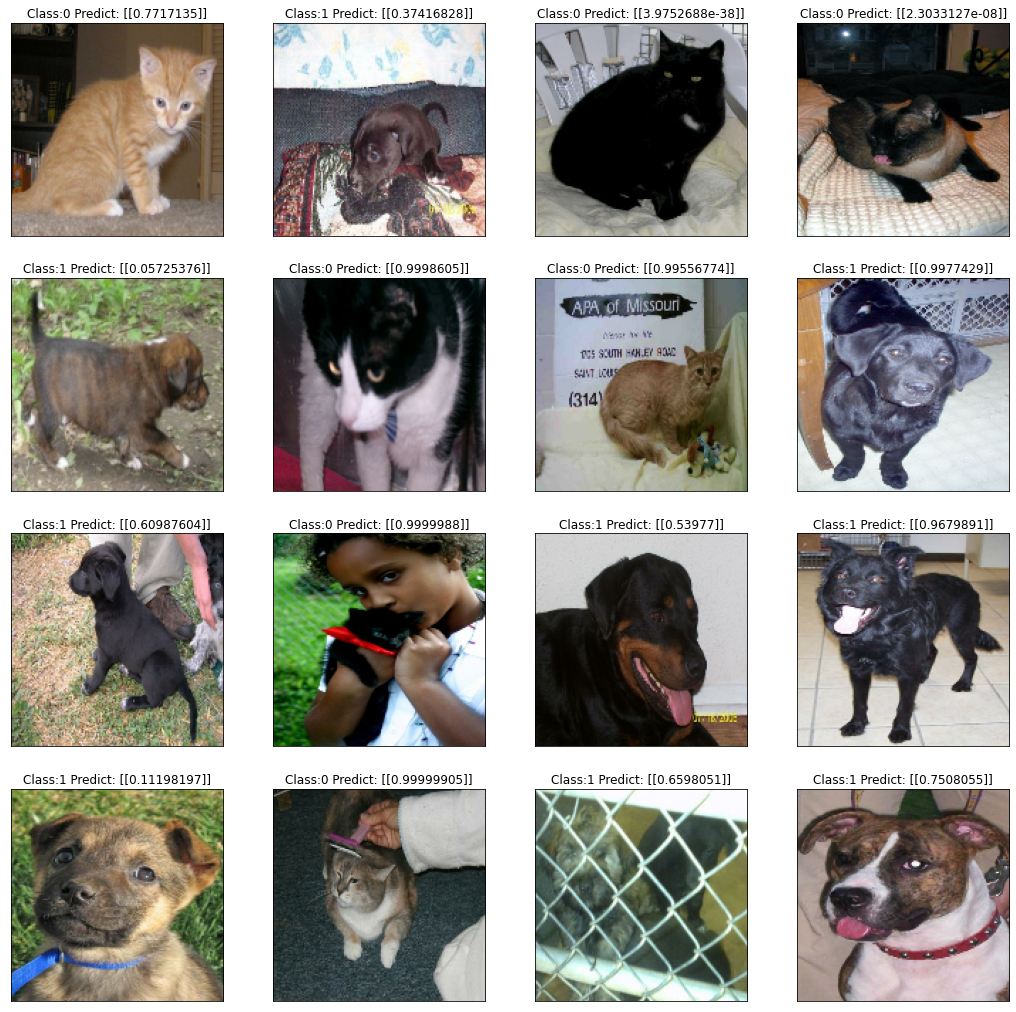

In [21]:
it_test = validation_ds.as_numpy_iterator()


n_images = 16
figure = plt.figure(figsize=(18, 18))

for i in range(n_images):

  img_batch = next(it_test)
  ax = plt.subplot(4, 4, i + 1)
  ax.imshow(img_batch[0][0,:,:,:]/255)
  ax.set_xticks(())
  ax.set_yticks(())
  ax.set_title( "Class:" +  str(img_batch[1][0]) + " Predict: " + str(model.predict(img_batch[0])))